In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('C:\AAPL.csv')
df2 = pd.read_csv('C:\india-news-headlines.csv')

In [3]:
df1.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
 df2.head()

,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; Messages; Cards; Greetings; Pictures; GIFs and Wallpapers
0,20200101,city.bhubaneswar,Bone-clling cold wavecontinues to sweep state
1,20200101,city.hyderabad,T gained 163 sq km forest cover
2,20200101,city.hyderabad,Draft electoral rolls published
3,20200101,city.koc,Invasive species increasing in Kerala's core f...
4,20200101,city.hyderabad,Onion price in Hyd dips to Rs 90/kg


In [5]:
df1.shape

(1258, 15)

In [6]:
df2.shape

(90872, 3)

In [7]:
df1.nunique()

Unnamed: 0     1258
symbol            1
date           1258
close          1201
high           1196
low            1209
open           1205
volume         1258
adjClose       1240
adjHigh        1237
adjLow         1238
adjOpen        1237
adjVolume      1258
divCash           7
splitFactor       1
dtype: int64

In [8]:
df2.nunique()

20200101                                                                                                    182
life-style.events                                                                                           256
Happy New Year 2020: Images; Quotes; Wishes; Messages; Cards; Greetings; Pictures; GIFs and Wallpapers    87856
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [10]:
df1.isna().any(), df2.isna().any()

(Unnamed: 0     False
 symbol         False
 date           False
 close          False
 high           False
 low            False
 open           False
 volume         False
 adjClose       False
 adjHigh        False
 adjLow         False
 adjOpen        False
 adjVolume      False
 divCash        False
 splitFactor    False
 dtype: bool,
 20200101                                                                                                  False
 life-style.events                                                                                         False
 Happy New Year 2020: Images; Quotes; Wishes; Messages; Cards; Greetings; Pictures; GIFs and Wallpapers    False
 dtype: bool)

In [11]:
df1.drop_duplicates()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [12]:
df2.drop_duplicates()

,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; Messages; Cards; Greetings; Pictures; GIFs and Wallpapers
0,20200101,city.bhubaneswar,Bone-clling cold wavecontinues to sweep state
1,20200101,city.hyderabad,T gained 163 sq km forest cover
2,20200101,city.hyderabad,Draft electoral rolls published
3,20200101,city.koc,Invasive species increasing in Kerala's core f...
4,20200101,city.hyderabad,Onion price in Hyd dips to Rs 90/kg
...,...,...,...
90867,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
90868,20200630,entertainment.ndi.bollywood,apurva asrani calls alia bhatts mother soni ra...
90869,20200630,entertainment.ndi.bollywood,kangana ranaut gets a doll version of herself ...
90870,20200630,entertainment.ndi.bollywood,meezaan jaffrey reminisces s cldhood days with...


In [13]:
# dropping duplicates
df1 = df1.drop_duplicates()

# coverting the datatype of column 'Date' from type object to type 'datetime'
df1['date'] = pd.to_datetime(df1['date']).dt.normalize()

# filtering the important columns required
df1 = df1.filter(['date', 'close', 'open', 'high', 'low', 'volume'])

# setting column 'Date' as the index column
df1.set_index('date', inplace= True)

# sorting the data according to the index i.e 'Date'
df1 = df1.sort_index(ascending=True, axis=0)
df1

,close,open,high,low,volume
date,,,,,
2015-05-27 00:00:00+00:00,132.045,130.34,132.260,130.0500,45833246
2015-05-28 00:00:00+00:00,131.780,131.86,131.950,131.1000,30733309
2015-05-29 00:00:00+00:00,130.280,131.23,131.450,129.9000,50884452
2015-06-01 00:00:00+00:00,130.535,131.20,131.390,130.0500,32112797
2015-06-02 00:00:00+00:00,129.960,129.86,130.655,129.3200,33667627
...,...,...,...,...,...
2020-05-18 00:00:00+00:00,314.960,313.17,316.500,310.3241,33843125
2020-05-19 00:00:00+00:00,313.140,315.03,318.520,313.0100,25432385
2020-05-20 00:00:00+00:00,319.230,316.68,319.520,316.2000,27876215


Text(0, 0.5, 'close Price ($)')

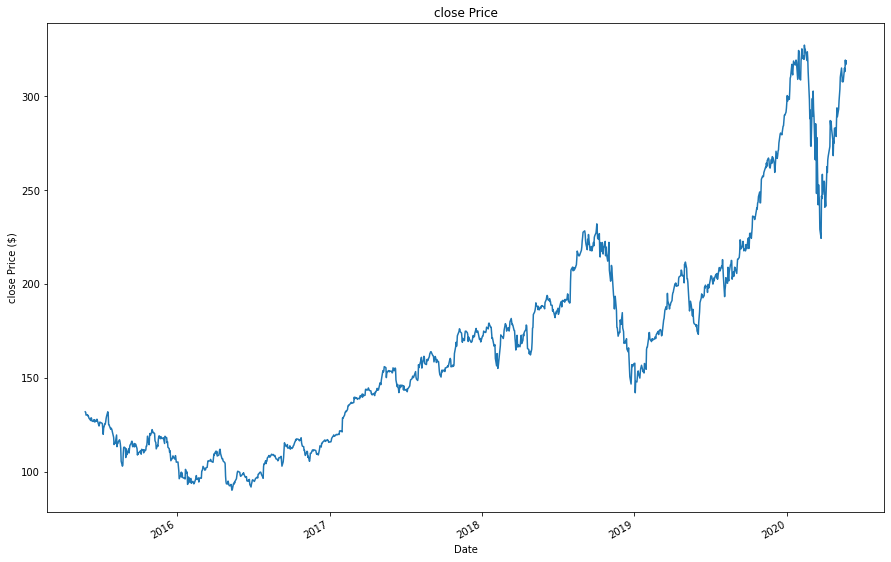

In [14]:
plt.figure(figsize=(15,10))
df1['close'].plot()
plt.title("close Price")
plt.xlabel('Date')
plt.ylabel('close Price ($)')

In [15]:
df1.rolling(7).mean().head(20)

,close,open,high,low,volume
date,,,,,
2015-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-05-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-05-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-06-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-06-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2015-06-04 00:00:00+00:00,130.582857,130.675714,131.317857,129.890000,3.752358e+07
2015-06-05 00:00:00+00:00,130.097857,130.555714,130.950714,129.648571,3.606552e+07
2015-06-08 00:00:00+00:00,129.529286,130.132857,130.559286,129.038571,3.920002e+07


<AxesSubplot:xlabel='date'>

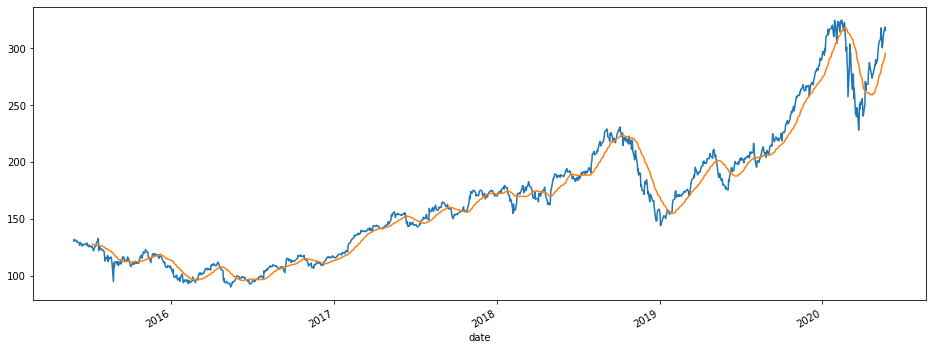

In [16]:
df1['open'].plot(figsize=(16,6))
df1.rolling(window=30).mean()['close'].plot()

In [17]:
df1=df1.reset_index()['close']

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(817, 441)

In [22]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [23]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(df1)-1))
train_end = int(data_to_use*0.8)
total_data = len(df1)
start = total_data - data_to_use
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1005
Number of records in Test Data: 253


In [24]:
import numpy 
def create_df1(df1, time_step = 1):
    dataX, dataY = [],[]
    for i  in range (len(df1)-time_step-1):
        a = df1[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(df1[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [25]:
time_step = 100
X_train, y_train = create_df1(train_data, time_step)
X_test, ytest = create_df1(test_data, time_step)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:

X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (716, 100, 1, 1)
Shape of Test set X: (340, 100, 1, 1)


In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Sequential' is not defined

In [31]:
model.summary()

NameError: name 'model' is not defined

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)



NameError: name 'model' is not defined

In [33]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

NameError: name 'train_predict' is not defined

In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

NameError: name 'test_predict' is not defined

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'train_predict' is not defined